In [64]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error,balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer


---

In [65]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("Resources/Housing.csv")

# Review the DataFrame
df_lending_data = pd.read_csv(file_path)

df_lending_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [66]:
# Perform mean imputation for numerical columns with missing values
numerical_columns_with_missing = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
for col in numerical_columns_with_missing:
    mean_value = df_lending_data[col].mean()
    df_lending_data[col].fillna(mean_value, inplace=True)

In [67]:
# Separate features and target
X = df_lending_data.drop(columns=['median_house_value'])
y = df_lending_data['median_house_value']

In [68]:
#Define categorical columns
categorical_columns = ['ocean_proximity']

# Define numerical columns
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [69]:
# Create transformers for preprocessing
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# One-hot encoding to categorical features
X_encoded = pd.get_dummies(X, columns=['ocean_proximity'])

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Create a ColumnTransformer to apply transformers to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ],
    remainder='passthrough'
)


In [70]:
# Linear Regression Model
model = LinearRegression()

# Create a pipeline that combines preprocessing and modeling
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model's performance
if r_squared >= 0.80:
    print("The model demonstrates meaningful predictive power.")
    print("R-squared:", r_squared)
    print("mse:", mse)
else:
    print("The model does not meet the performance threshold.")
    print("R-squared:", r_squared)
    print("mse:", mse)

The model does not meet the performance threshold.
R-squared: 0.6258771951358701
mse: 4902538824.586241


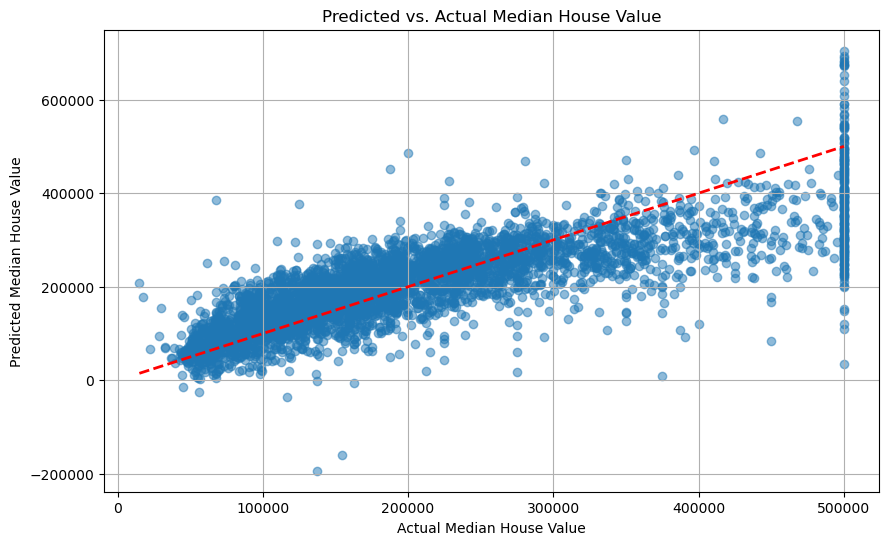

In [71]:
# Linear Regression Model Graph

# Make predictions using the trained pipeline
y_pred = pipeline.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs. Actual Median House Value")
plt.grid(True)

# Add a line representing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

plt.show()

In [72]:
#Random Forest Regressor Model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # You can change the imputation strategy
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline that combines preprocessing and modeling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate R-squared and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)





R-squared: 0.8173290384570426
Mean Squared Error: 2393736680.697894


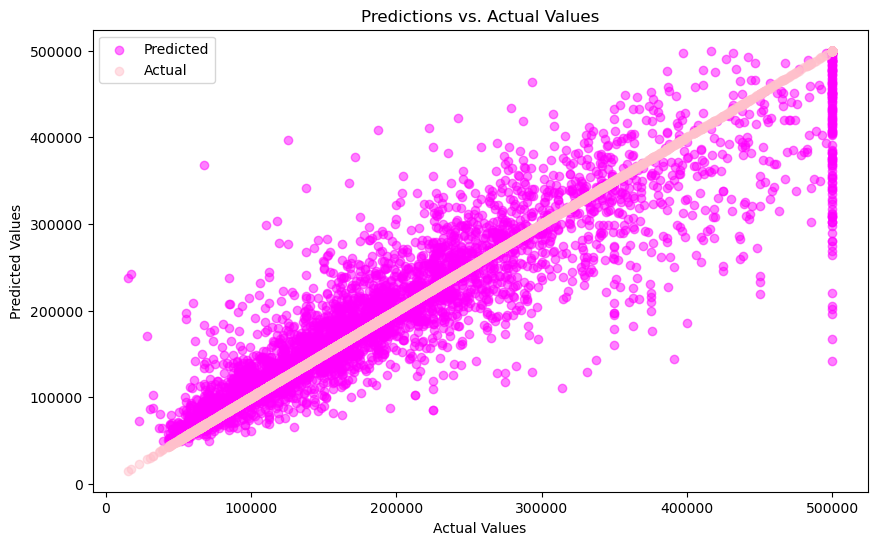

In [73]:
#Random Forest Regressor Model Graph

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Create a scatter plot to visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='magenta', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='pink', label='Actual', alpha=0.5)
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [74]:
# Gradient Boosting Regressor


# Numeric features transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical features transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer to apply different transformers to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Create a pipeline that combines preprocessing and the Gradient Boosting Regressor model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', gb_model)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)


R-squared: 0.7609962615313416


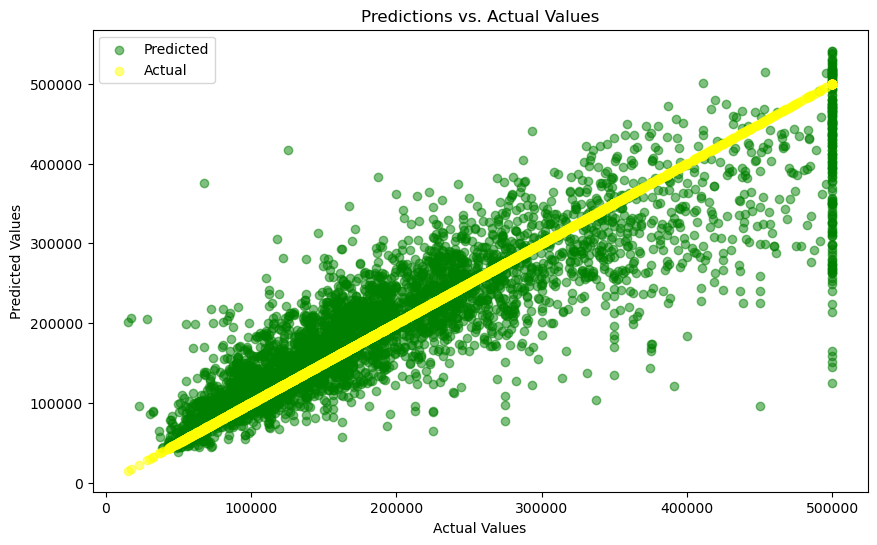

In [75]:
# Gradient Boosting Regressor Graph

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Create a scatter plot to visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='yellow', label='Actual', alpha=0.5)
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [76]:
# K-Nearest Neighbors (KNN) Regressor

# Numeric features transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical features transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer to apply different transformers to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the K-Nearest Neighbors (KNN) Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can specify the number of neighbors here

# Create a pipeline that combines preprocessing and the KNN Regressor model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', knn_model)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)


R-squared: 0.7112550471968917


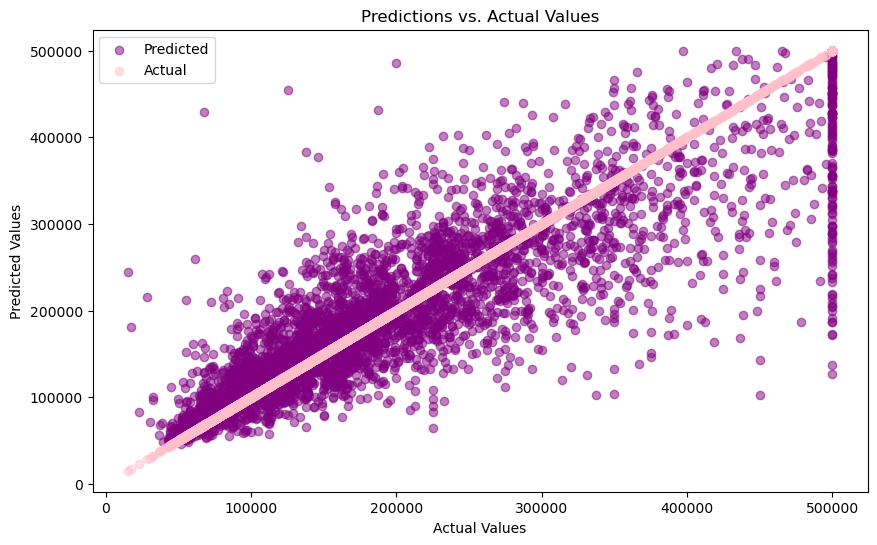

In [77]:
# K-Nearest Neighbors (KNN) Regressor Graph

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Create a scatter plot to visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='pink', label='Actual', alpha=0.5)
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()